Ensemble: a combination of a set of ML models 

1.  Bagging apporach

2.  Boosting approach

3.  Stacking approach



#Bagging approach

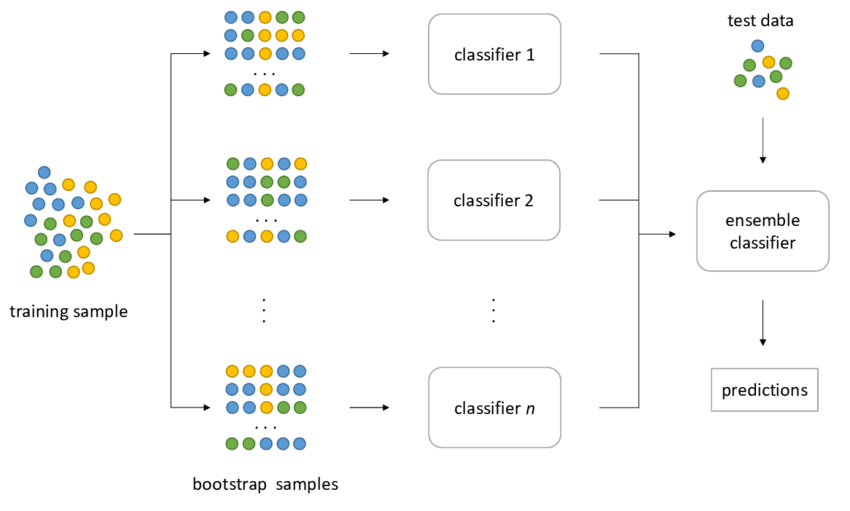

1. In bagging approach the trainset is devided to multiple subsets, each subset is called a bag of data. 

2. we apply the same classifier on each bag 

For example; if we have 5 classifiers, and the predicted value of the target variable for the first row of the test set for each classifier is as follows
(blue, blue, green, blue, green)
ensemble class: blue 

#Boosting approach

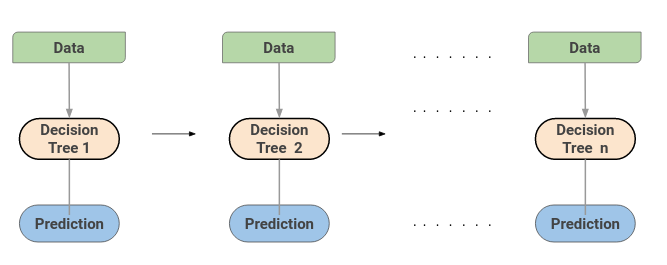

#Boosting approach

1.  the same dataset to train each classifier

2. we apply the same classifier and they are learnt from both data and estiamted parameters of the pervious classifer

3.  we combine the predicted value of classifiers using mode

# Stacking method

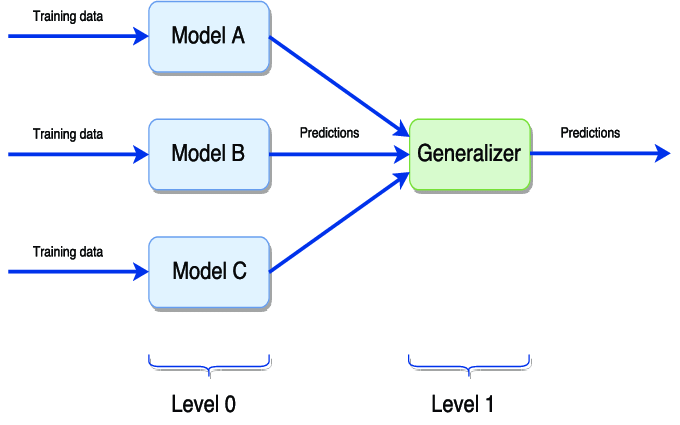

In [1]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 
from sklearn.linear_model import LogisticRegression, LinearRegression
#from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

# Example 1:
Apply bagging classifier based on decision tree and logistic regression model, evaluate the accuracy of base models versus its bagging method. 

In [2]:
from pandas import read_csv
data = read_csv('dataset_CA/heart2.csv')
X = data.drop('HeartDisease', axis=1)  # input
y = data['HeartDisease']   # output
data.head(2)
data.shape

(918, 12)

In [3]:
   
clf1 = DecisionTreeClassifier(criterion='entropy') # base learner 1
clf2 = LogisticRegression( )    # base learner 2
clf3=GaussianNB()
# bagging learner 1
bagging1 = BaggingClassifier(estimator=clf1, n_estimators=50, max_samples=0.8, max_features=0.8)
# bagging learner 2
bagging2 = BaggingClassifier(estimator=clf2, n_estimators=50, max_samples=0.8, max_features=0.8)

# bagging learner 3
bagging3 = BaggingClassifier(estimator=clf3, n_estimators=50, max_samples=0.8, max_features=0.8)


In [5]:
import warnings
warnings.filterwarnings("ignore")

label = ['dt', 'LR','gnb', 'Bagging Tree', 'Bagging LR','Bagging NB']
clf_list = [clf1, clf2,clf3, bagging1, bagging2,bagging3]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3), label))

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 560, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'F'

--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 560, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'M'


# Extend the above implementation to GaussianNB and compare the result of NB bagging approach versus others. 

# Regression example: 

create a bagging regressor using linear regression and support vector regression. Evalute these models in terms of rmse and specify the best bagging model. To do so, consider dataset_GLM , Sprint as the output variable and Math, Reading, Writing and English are input variables. 

In [ ]:
from pandas import read_csv, DataFrame
import numpy as np
data=read_csv('/content/dataset_GLM.csv')
data.head()
df=data[['English',	'Reading',	'Math',	'Writing', 'Sprint']]
df.iloc[1:10]

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head(10)
 
df.dropna( inplace=True) 
import pandas as pd
X=df.drop('Sprint',axis=1)
y=df['Sprint']

In [ ]:
import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
 
 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt 
 
 

In [ ]:
r1 = LinearRegression() # base learner 1
r2 = SVR()    # base learner 2
# bagging learner 1
baggingreg1 = BaggingRegressor(base_estimator=r1, n_estimators=10, max_samples=0.8, max_features=0.8)
# bagging learner 2
baggingreg2 = BaggingRegressor(base_estimator=r2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

label = [ 'Bagging linreg', 'Bagging svr']
clf_list = [baggingreg1, baggingreg2]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='neg_root_mean_squared_error')
    print ("-rmse:  ",(round(scores.mean(),4), round(scores.std(),3), label))

-rmse:   (-1.2087, 0.116, 'Bagging linreg')
-rmse:   (-1.2184, 0.117, 'Bagging svr')


since bagging linear regression has the highest -rmse therefore it is the best model 

In [ ]:
num_est = np.arange(10,100,10)
num_est


array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# tune the value of number of bags in the bagging approach 

 #Ensemble Size
# evalute the bagging method based on DT for different numbers of bag size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingRegressor(base_estimator=r1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='neg_root_mean_squared_error')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean


[-1.1859019554648917,
 -1.1943497047664036,
 -1.1976552506772766,
 -1.1982864857631281,
 -1.1962467231636242,
 -1.1963760587905898,
 -1.1956387819369787,
 -1.1977567063972387,
 -1.1975507540392278]

# the optimal value for number of bags is 10 

# Exercise:
Create two bagging approach one is based on decision tree and the second is logistic regression. Evaluate both bagging approaches and specify the better one. To do so, we use **seed_data** where the output variable is **target**. 

In [ ]:
data=read_csv('Seed_Data.csv')
data.head()
y=data['target']
X=data.drop('target',axis=1)

# Exercise2:

use the following code to find the best value of number of bage in bagging approach

In [ ]:
num_est = np.arange(10,100,10)
num_est

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:

#Ensemble Size
# evalute the bagging method based on DT for different numbers of bag size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

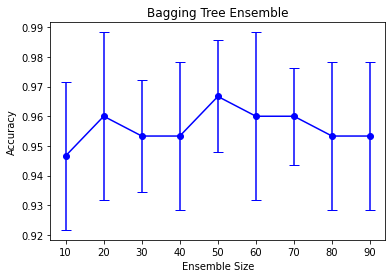

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

# Example 3: 
Apply NB classifier as the base learner in bagging approach to model Species to other variable in the Iris dataset. 

1.  what is the optimal number of bags/subsets of trainset?

2.  evaluate base learner and its bagging technique in terms of accuracy in 4-fold cross validation. 

In [ ]:
from pandas import read_csv
data= read_csv('Iris.csv')
X= data.drop(['Species'], axis=1)
y=data['Species']
data.head(2)
data.shape

(150, 5)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# apply Gaussian NB and its bagging technique 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [ ]:
#1
#Ensemble Size
# evalute the bagging method based on DT for different numbers of bag size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    baggingnb = BaggingClassifier(base_estimator=nb, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(baggingnb, X, y, cv=4, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

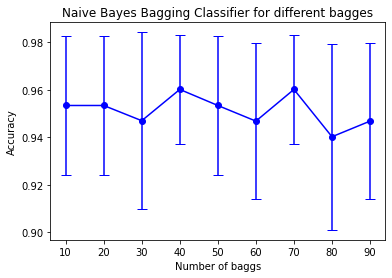

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Number of baggs'); plt.title('Naive Bayes Bagging Classifier for different bagges');
plt.show()

# conclusion for part a
the optimal number of baggs is 40 as it has the highest accuracy. 

In [ ]:
#part 2
 
label = ['nb', 'baggingnb']
baggingnb = BaggingClassifier(base_estimator=nb, n_estimators=40, max_samples=0.8, max_features=0.8)
clf_list = [nb, baggingnb]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=4, scoring='accuracy')
    print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3), label))

Accuracy:   (0.9534, 0.029, 'nb')
Accuracy:   (0.9536, 0.029, 'baggingnb')


# Conclusion:

Bagging NB provide the highest accuracy therefore bagging Naive Bayes will improve the result. 

# N.B.
the optimal ensamble size is corresponding to the model with the highest accuray and potentially the lowest std. 

In this case i=50

# use cancer dataaset to predict diagnosis based three bagging approach(dt, logsitic reg, naive bayes )

#Example 2:

import **Seed_Data**, consider **target** as the output variable and the remaining features as input variables, 

1.  apply **SVC** with linear kernel and **Naive Bayes** classifiers as the base model
2.   compute bagging approach for both base classifers
3. specify the best bagging approach via evaluating cross-validation score and plot the error bar. 

# solution

In [ ]:
from pandas import read_csv
data=read_csv('Seed_Data.csv')
data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
 
X= data.drop(['target'], axis=1)
y=data['target']
 

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import BaggingClassifier

clf1 = SVC(kernel='linear') # base learner 1
clf2 = GaussianNB( )    # base learner 2
# bagging learner 1
bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
# bagging learner 2
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

label = ['SVC', 'NB', 'Bagging SVC', 'Bagging NB']
clf_list = [clf1, clf2, bagging1, bagging2]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(round(scores.mean(),4), round(scores.std(),3), label))

Accuracy:   (0.8905, 0.075, 'SVC')
Accuracy:   (0.8762, 0.07, 'NB')
Accuracy:   (0.8857, 0.091, 'Bagging SVC')
Accuracy:   (0.8857, 0.065, 'Bagging NB')


# N.B.
The best model is bagging SVC since it has the highest accuracy and lowest std

# N.B.
Specify the best number of bag's size

In [ ]:
  
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

[0.9,
 0.8952380952380952,
 0.8952380952380953,
 0.8857142857142857,
 0.8904761904761904,
 0.9,
 0.8904761904761905,
 0.8952380952380953,
 0.9]

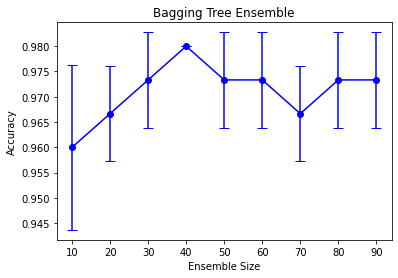

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

#Example 3:

import **winequality-red** dataset, consider **quality** as the output variable and the remaining features as input variables, 

1.  apply **dt** with entropy rule and **Naive Bayes** classifiers as the base model
2.   compute bagging approach for both base classifers
3. specify the best bagging approach via evaluating cross-validation score with 5 folds and plot the error bar.

4. specify the best bagging approach via evaluating 100 mc runs and plot the error bar.

# step 1---function: create the models
#step 2---function : evaluate the models in 100 mc runs
#step 3: use functions 1 and 2 on the dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisiontreeClassifier 



# Hint for CA 2 Question 1 part C and d

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict() 
  models['dt'] = DecisiontreeClassifier(criterion='entropy')
  models['bagg_dt'] = BaggingClassifier(base_estimator=DecisiontreeClassifier(criterion='entropy'), n_estimators=10) # 10 bags
  models['bagg_nb'] = AdaBoostClassifier(base_estimator=DecisiontreeClassifier(criterion='entropy'), n_estimators=10) # 10 steps
  return models

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict() 
  models['dt'] = DecisiontreeClassifier(criterion='entropy')
  models['bayes'] = GaussianNB()
  models['bagg_svc'] = BaggingClassifier(base_estimator=SVC(), n_estimators=10) # 10 bags
  models['bagg_nb'] = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10) # 10 bags
  return models

In [ ]:
models=get_models()
models.items()

# use svc and Naive Bayes classifiers as the base model, apply bagging approach for both base classifer, specify the best bagging approach via evaluating accuracy in 100 mc runs. 


In [ ]:
# create the function to evaluate the models
import numpy as np
from sklearn.metrics import accuracy_score
def evaluate_model(model, X, y):
  acc = []
  for j in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = j)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    scores=np.mean(acc) 
    return scores

In [ ]:
# specify the input and output variables

from pandas import read_csv
data= read_csv('/content/winequality-red.csv')

X= data.drop(['quality'], axis=1)
y=data['quality']
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#run the models on the dataset
from sklearn.model_selection import train_test_split
 
from numpy import mean, std
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 


>svm 0.978 (0.000)
>bayes 1.000 (0.000)
>bagg_svc 0.978 (0.000)
>bagg_nb 1.000 (0.000)


# Example 3: (boosting approach=adaboost)
 use **mtcars** dataset, consider **cyl** as the output variable and the remaining features are input variables. Train dt and adaboost based on decsion tree using this dataset in 100 mc runs and print out the mean and standard deviation of accuracy.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [ ]:
data=read_csv('mtcars.csv')
data.head(3)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
data=data.drop('model',axis=1)
data=data.astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     float64
 2   disp    32 non-null     float64
 3   hp      32 non-null     float64
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     float64
 8   am      32 non-null     float64
 9   gear    32 non-null     float64
 10  carb    32 non-null     float64
dtypes: float64(11)
memory usage: 2.9 KB


In [ ]:
X=data.drop('cyl',axis=1) # input variables
y=data['cyl']
y.value_counts()

8.0    14
4.0    11
6.0     7
Name: cyl, dtype: int64

In [ ]:
# create models
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=10)


In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['dt'] = DecisionTreeClassifier(criterion='entropy', max_depth=1)
  models['adaboost'] = AdaBoostClassifier(base_estimator=clf, n_estimators=10)
  return models

In [ ]:
models=get_models()

In [ ]:
# apply mc runs to validate the result
import numpy as np

def evaluate_model(model, X, y):
  mc=100
  acc = [] ### Blank vector
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)# split dataset
    dt = model.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    return np.mean(acc)

In [ ]:
models.items()

In [ ]:
from numpy import mean, std
from sklearn.metrics import accuracy_score
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
 

('dt', 0.5, 0.0)
('adaboost', 0.75, 0.0)


In [ ]:
print( (name, mean(scores), std(scores)))

('adaboost', 0.75, 0.0)



Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [ ]:
import numpy as np
np.arange(2,20,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
#Ensemble Size
num_est = np.arange(2,20,2)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

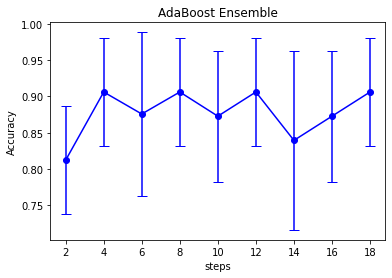

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('steps'); plt.title('AdaBoost Ensemble');
plt.show()

#Use mtcars dataset, consider cyl as the output varible. Apply decision tree classifier to model 70% of the dataset and evaluate its accuracy. 
#run the model based on Adaboost and print out accuracy, which model has the higher accuracy?

In [ ]:
from pandas import read_csv
data= read_csv('mtcars.csv')
X= data.drop(['cyl'], axis=1)
y=data['cyl']
X.head(2)


,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,160.0,110,3.9,2.875,17.02,0,1,4,4


In [ ]:
from sklearn.tree import DecisionTreeClassifier
base=DecisionTreeClassifier()

In [ ]:
#Ensemble Size
num_est = 4 # number of subset
 
score_dt = cross_val_score(base, X, y, cv=3, scoring='accuracy')
ada_clf = AdaBoostClassifier(base_estimator=base, n_estimators=n_est)
score_ada = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
print('accuracy of dt classifer:',np.mean(score_dt) )  
print('accuracy of adaBoost classifer:',np.mean(score_ada) ) 

accuracy of dt classifer: 0.8757575757575758
accuracy of adaBoost classifer: 0.8424242424242424


# Example 4:  
 use **winequality-red** dataset, consider **quality** as the output variable and the remaining features are input variables. Train **decision tree**, **bagging decision tree** and **adaboost based on decsion tree** using this dataset in 100 mc runs and print out the mean and standard deviation of accuracy.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

In [ ]:
#Solution
from pandas import read_csv

data=read_csv('winequality-red.csv')
data.head(3)
data=data.astype('float')
X=data.drop('quality',axis=1)
y=data['quality']

In [ ]:
#Ensemble Size
model = DecisionTreeClassifier(criterion='entropy')
num_est = np.arange(2,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = BaggingClassifier(base_estimator=model, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

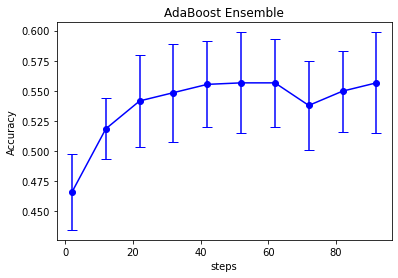

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('steps'); plt.title('AdaBoost Ensemble');
plt.show()

In [ ]:
# create the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
def get_models():
  models = dict()
  models['dt'] = DecisionTreeClassifier(criterion='entropy')
  models['bdt']=BaggingClassifier(base_estimator=models['dt'], n_estimators=40)
  models['adaboost'] = AdaBoostClassifier(base_estimator=models['dt'], n_estimators=14)
  return models

In [ ]:
models=get_models()
models

{'adaboost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                    n_estimators=10),
 'bdt': BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy')),
 'dt': DecisionTreeClassifier(criterion='entropy')}

In [ ]:
def evaluate_model(model, X, y):
  mc=10
  acc = [] ### Blank vector
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
    dt = model.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    return np.mean(acc)

In [ ]:
y.value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [ ]:
# get the models to evaluate
from numpy import mean , std
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
 

('dt', 0.6104166666666667, 0.0)
('bdt', 0.63125, 0.0)
('adaboost', 0.6083333333333333, 0.0)


# Practical example in Finance 

1. Use Default load dataset, apply **logistic regression**, **Naive Bayes classifier**, **Decision tree classifier** and **Support vector classifier** to predict the varible **defaulted** 

2. For **logistic regression**, **Naive Bayes classifier**, **Decision tree classifier** , create a  **bagging classifier**  and evalute the classifier in terms of an appropriate metric of performance. 

3. For each base model, create a **boosting classifier** and evalute the classifier in terms of an appropriate metric of performance.





In [ ]:
from pandas import read_csv
data=read_csv('/content/Default_Loan.csv')
data.head()
data=data.drop('Index', axis=1)
X=data.drop('Defaulted?', axis=1)

y=data['Defaulted?']
y.value_counts()
X.head()

# dealing with imbalanced dataset

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')



# Solution part (1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

from sklearn.tree import DecisionTreeClassifier # decision tee algorithm for classification
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['dt_ent'] = DecisionTreeClassifier()
  models['mlr']=LogisticRegression()
  models['svc_linear']=SVC(kernel='linear')
  models['svc_sig']=SVC(kernel='sigmoid')
  models['svc_poly']=SVC(kernel='poly')
  models['svc_rbf']=SVC(kernel='rbf')
  models['nb']=GaussianNB()
  return models

In [ ]:
models=get_models()
models.items()

dict_items([('dt_ent', DecisionTreeClassifier()), ('mlr', LogisticRegression()), ('svc_linear', SVC(kernel='linear')), ('svc_sig', SVC(kernel='sigmoid')), ('svc_poly', SVC(kernel='poly')), ('svc_rbf', SVC()), ('nb', GaussianNB())])

In [ ]:
# evaluate the model using Monte Carlo sampling 
    
import numpy as np
def evaluate_model(model, X, y):
  acc = [] ### Blank vector
 
  for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)# split dataset
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    dt = model.fit(X_over,y_over) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
     
    return np.mean(acc)

In [ ]:
from numpy import mean, std

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
# plot model performance for comparison

('dt_ent', 0.958, 0.0)
('mlr', 0.665, 0.0)
('svc_linear', 0.832, 0.0)
('svc_sig', 0.533, 0.0)
('svc_poly', 0.866, 0.0)
('svc_rbf', 0.856, 0.0)
('nb', 0.85, 0.0)


In [ ]:
from numpy import mean, std

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
# plot model performance for comparison

('dt_ent', 0.19047619047619047, 0.0)
('mlr', 0.0, 0.0)
('svc_linear', 0.21052631578947367, 0.0)
('svc_sig', 0.0, 0.0)
('svc_poly', 0.0, 0.0)
('svc_rbf', 0.0, 0.0)
('nb', 0.2571428571428571, 0.0)


# 
since there is a significant difference btw recall and accuracy, therefore we have to apply some balancing technique i.e. oversampling 

# reapply the base models: 

In [ ]:
from numpy import mean, std

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_over, y_over)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
# plot model performance for comparison

('dt_ent', 1.0, 0.0)
('mlr', 0.8698347107438017, 0.0)
('svc_linear', 0.9053784860557769, 0.0)
('svc_sig', 0.5116514690982776, 0.0)
('svc_poly', 0.8147368421052632, 0.0)
('svc_rbf', 0.9156378600823045, 0.0)
('nb', 0.9046673286991063, 0.0)


In [ ]:
from numpy import mean, std

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_over, y_over)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
# plot model performance for comparison

('dt_ent', 0.9881075491209927, 0.0)
('mlr', 0.7616339193381593, 0.0)


# Solution part 2:
 bagging classifier using decision tree 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:

# get a list of models to evaluate
def get_models():
  models = dict()
  models['dt_ent'] = DecisionTreeClassifier()
  models['mlr']=LogisticRegression()
  models['nb']=GaussianNB()
  models['bagg_dt'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10) # 10 bags
  models['bagg_lr'] = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10) # 10 bags
  models['bagg_nb'] = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10) # 10 bags
  return models

In [ ]:
models=get_models()
models.items()

In [ ]:
from numpy import mean, std

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
# plot model performance for comparison

('dt_ent', 0.957, 0.0)
('mlr', 0.686, 0.0)
('nb', 0.867, 0.0)
('bagg_dt', 0.971, 0.0)
('bagg_lr', 0.673, 0.0)
('bagg_nb', 0.853, 0.0)


# conclusion:
the best model among all base and bagging will be bagging decision tree algorithm. 

# part 3: Boosting classifiers 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['dt_ent'] = DecisionTreeClassifier()
  models['mlr']=LogisticRegression()
  models['nb']=GaussianNB()
  models['bagg_dt'] = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10) # 10 bags
  models['bagg_lr'] = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10) # 10 bags
  models['bagg_nb'] = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10) # 10 bags

  models['boost_dt'] = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10) # 10 bags
  models['boost_lr'] = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10) # 10 bags
  models['boost_nb'] = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=10) # 10 bags

  return models

In [ ]:
models=get_models()
models.items()

dict_items([('dt_ent', DecisionTreeClassifier()), ('mlr', LogisticRegression()), ('nb', GaussianNB()), ('bagg_dt', BaggingClassifier(base_estimator=DecisionTreeClassifier())), ('bagg_lr', BaggingClassifier(base_estimator=LogisticRegression())), ('bagg_nb', BaggingClassifier(base_estimator=GaussianNB())), ('boost_dt', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)), ('boost_lr', AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10)), ('boost_nb', AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=10))])

In [ ]:
from numpy import mean, std

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print(  (name, mean(scores), std(scores)))
# plot model performance for comparison

('dt_ent', 0.948, 0.0)
('mlr', 0.676, 0.0)
('nb', 0.847, 0.0)
('bagg_dt', 0.952, 0.0)
('bagg_lr', 0.663, 0.0)
('bagg_nb', 0.843, 0.0)
('boost_dt', 0.953, 0.0)
('boost_lr', 0.676, 0.0)
('boost_nb', 0.86, 0.0)


# deploy the model

for this step, we can retrain the best model based on entire dataset as follows: 

In [ ]:
X_over, y_over = oversample.fit_resample(X, y)
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10) # 10 bags
best = model.fit(X_over,y_over) # fit the model

In [ ]:
import numpy as np

In [ ]:
x1=input('Employed:')  #SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm
x2=input('Bank Balance:')
x3=input('Annual Salary:')
x=np.array([x1,x2,x3])
y=best.predict(x.reshape(1,-1))
print('recommendation:',y)

Employed:1
Bank Balance:2000
Annual Salary:21000
recommendation: [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"
